In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Data Loading

In [2]:
%run ../util/load_data.py
%run ../util/data_visualization.py
%run ../util/outliers_statistics.py

import warnings
warnings.filterwarnings('ignore')

data = load_data("../data")

/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


# Classification

Let's create now the estimator pipeline.

In [3]:
classifier = Pipeline([
    ('scl', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

X = data['train_data'][data['numerical_attributes'] + data['categorical_attributes']]
y = data['train_data'][data['target']]

## Learning curve

<module 'matplotlib.pyplot' from '/Users/andrluc/.pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/pyplot.py'>

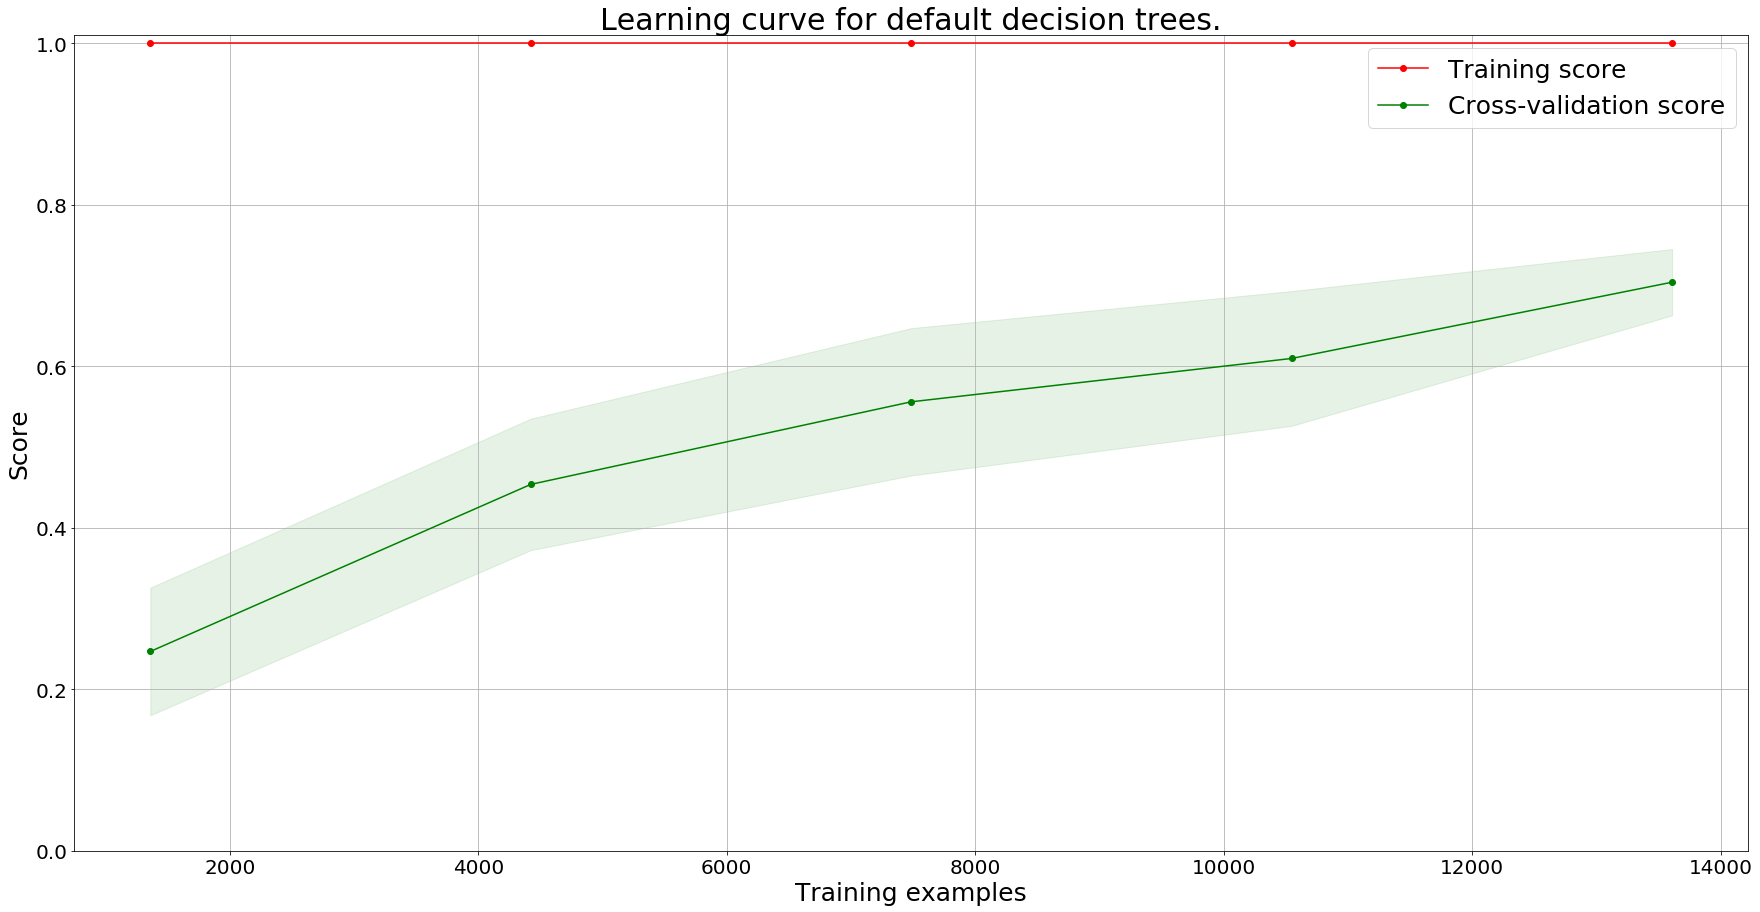

In [4]:
kfold = StratifiedKFold(n_splits = 10)
plot_learning_curve(classifier, 'Learning curve for default decision trees.', 
                    X, y, ylim=(0, 1.01), cv=kfold, n_jobs=4)

## Validation curve with tree max_depth

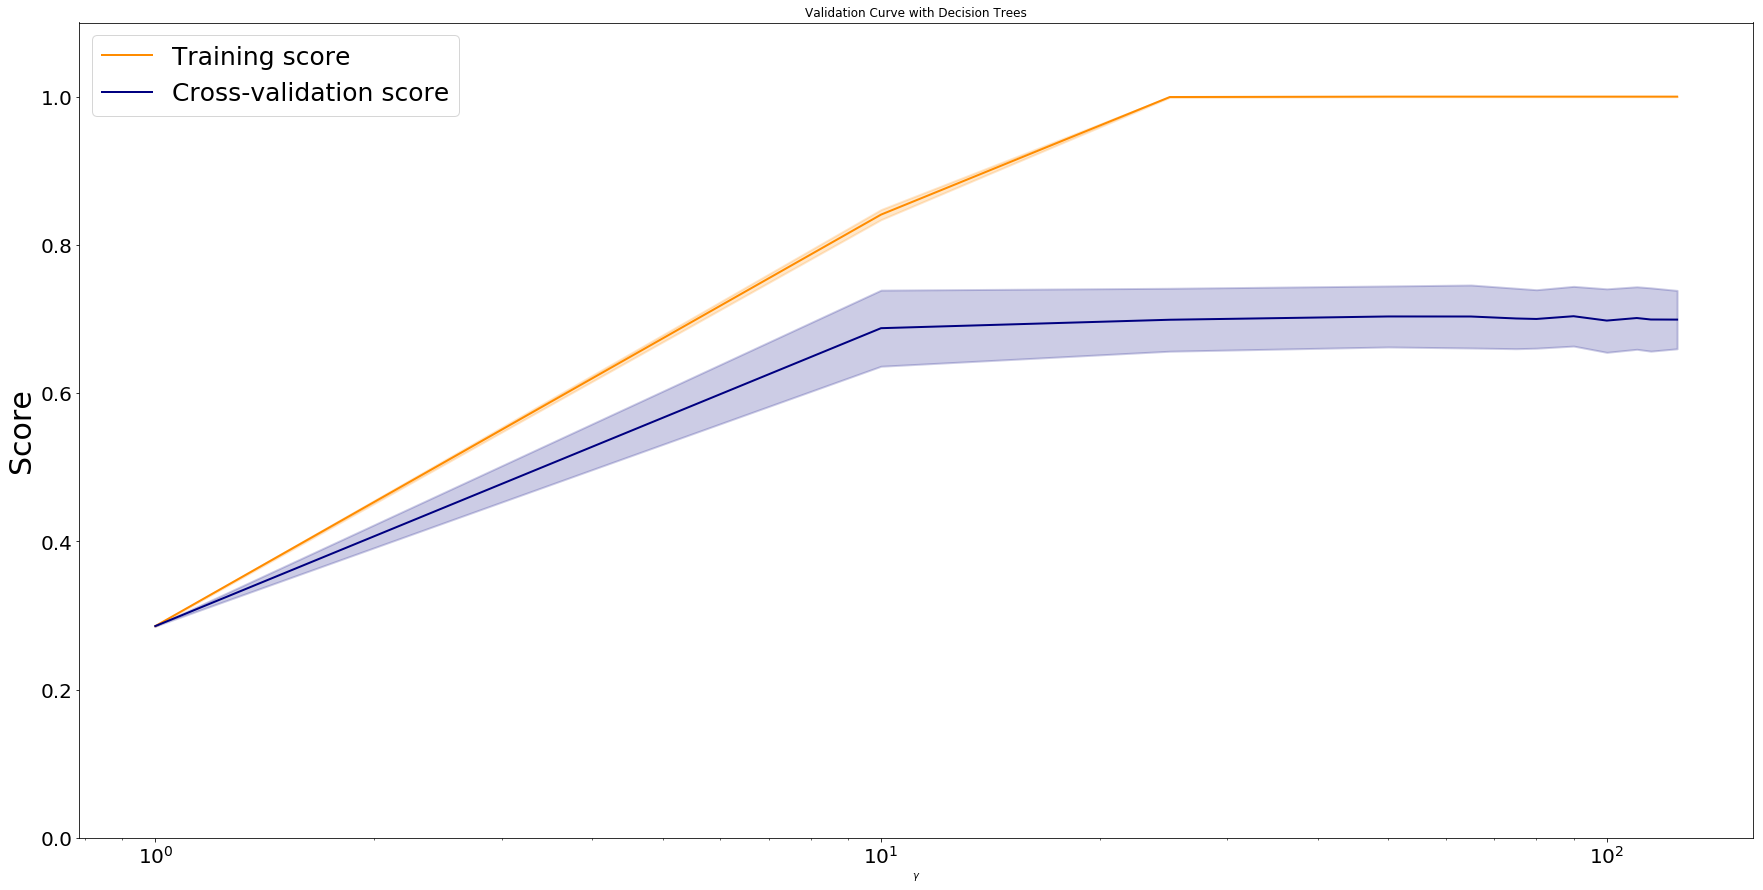

In [5]:
param_range = [1, 10, 25, 50, 65, 75, 80, 90, 100, 110, 115, 125]

train_scores, test_scores = validation_curve(
    estimator = classifier,
    X = X,
    y = y,
    param_name = 'clf__max_depth',
    param_range = param_range,
    cv = 10
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(30, 15))
plt.title("Validation Curve with Decision Trees")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score", fontsize=30)
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best", prop={'size': 25})
plt.tick_params(labelsize=20)

plt.show()


## Confusion matrix

[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]
[4 4 4 ... 3 3 2]


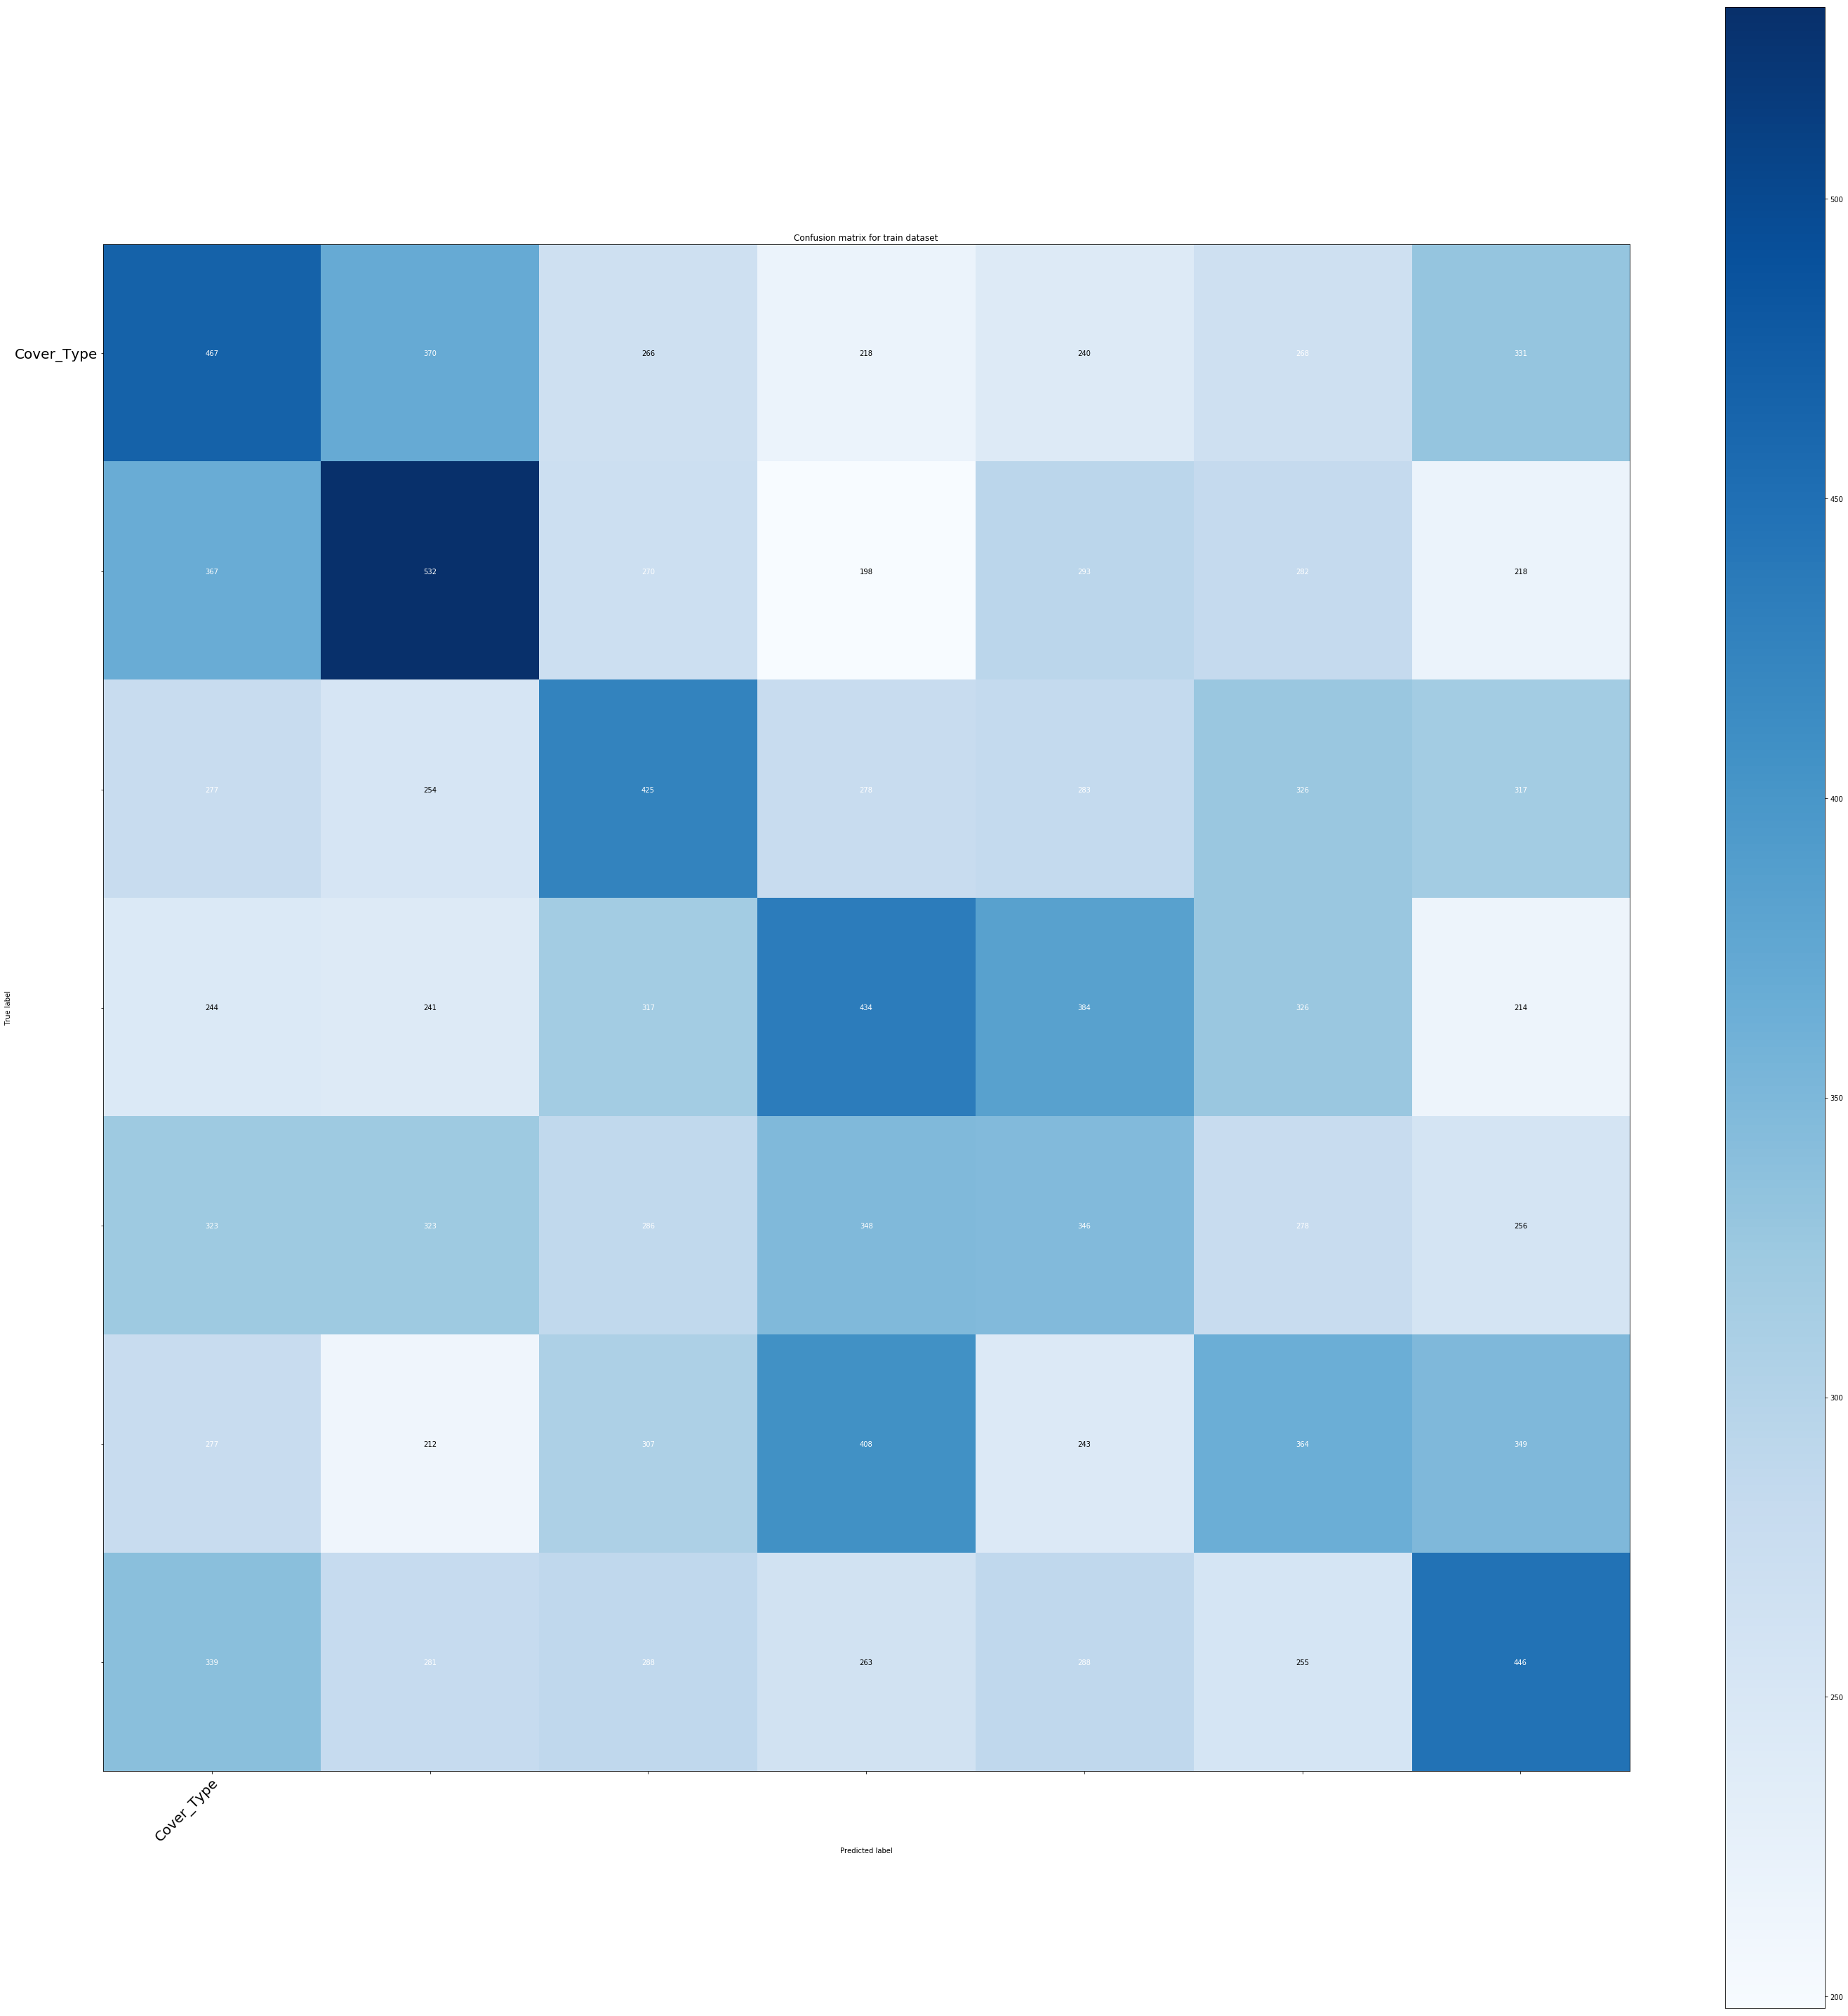

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    fig, ax = plt.subplots(figsize=(40, 40))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, 
           yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.tick_params(labelsize=20)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

y_predicted_total = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    classifier.fit(X_train, y_train)
    
    y_predicted_total += classifier.predict(X_test).tolist()
    
    print(y_predicted)
    
plot_confusion_matrix(y, y_predicted_total, classes=list(set(y[data['target']])),
                  title='Confusion matrix for train dataset')

In [ ]:
data['test_data'].info()